<a href="https://colab.research.google.com/github/Maks6666/ML/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BC%D0%B5%D1%80%D0%B5%D0%B6%D1%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [2]:
import pandas as pd

Дані про морське вухо(молюск)

<div>
<img src="https://m.media-amazon.com/images/I/81-FC5TlLtL.jpg" width="500"/>
</div>

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/abalone.csv')
df.drop(columns=['Type', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'], inplace=True)

In [4]:
df.head()

,LongestShell,Diameter,Height,Rings
0,0.455,0.365,0.095,15
1,0.350,0.265,0.090,7
2,0.530,0.420,0.135,9
3,0.440,0.365,0.125,10
4,0.330,0.255,0.080,7


Потрібно на основі розмірів молюска спрогнозувати кількість кілець в мушлі `Rings`. Використовуйте процесор cpu

# Завдання 1
Створіть клас Dataset

In [5]:
from torch.utils.data import Dataset
import torch

class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.FloatTensor(X.values)
    self.y = torch.FloatTensor(y.values)
    self.y = self.y.reshape(-1, 1)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

X = df.drop("Rings", axis="columns")
y = df["Rings"]

dataset = MyDataset(X, y)

In [10]:
len(dataset)

4177

In [8]:
dataset[0]

(tensor([0.4550, 0.3650, 0.0950]), tensor([15.]))

# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [11]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=True)

In [12]:
X_batch, y_batch = next(iter(dataloader))

In [13]:
X_batch.shape

torch.Size([128, 3])

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-3
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [14]:
from torch import nn

model = nn.Sequential(
    nn.Linear(3, 5),
    nn.ReLU(),
    nn.Linear(5, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 2),
    nn.ReLU(),
    nn.Linear(2, 1),

)

model

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=2, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2, out_features=1, bias=True)
)

In [17]:
from torchsummary import summary

summary(model, input_size=(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              20
              ReLU-2                    [-1, 5]               0
            Linear-3                    [-1, 4]              24
              ReLU-4                    [-1, 4]               0
            Linear-5                    [-1, 3]              15
              ReLU-6                    [-1, 3]               0
            Linear-7                    [-1, 2]               8
              ReLU-8                    [-1, 2]               0
            Linear-9                    [-1, 1]               3
Total params: 70
Trainable params: 70
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
-----------------------------------------------------

# Завдання 4
Визначте функцію втрат та оптимізатор

In [29]:
from torch.optim import SGD

loss = nn.MSELoss()

optimizer = SGD(model.parameters(), lr=1e-1)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [30]:
import numpy as np

epochs = 100
losses = []

for epoch in range(epochs):
  t_losses = []
  for X_batch, y_batch in dataloader:
    y_pred = model(X_batch)
    loss_value = loss(y_pred, y_batch)
    t_losses.append(loss_value.detach().numpy())

    loss_value.backward()
    optimizer.step()
    optimizer.zero_grad()

  losses.append(np.mean(t_losses))


  if epoch % 1 == 0:
    print(f"Loss = {losses[epoch]}")


Loss = 16.20256805419922
Loss = 10.433526039123535
Loss = 10.419018745422363
Loss = 10.372063636779785
Loss = 10.47530746459961
Loss = 10.387989044189453
Loss = 10.400646209716797
Loss = 10.426987648010254
Loss = 10.371533393859863
Loss = 10.404903411865234
Loss = 10.374960899353027
Loss = 10.40427303314209
Loss = 10.387890815734863
Loss = 10.38532543182373
Loss = 10.3880033493042
Loss = 10.401010513305664
Loss = 10.402266502380371
Loss = 10.377732276916504
Loss = 10.409282684326172
Loss = 10.417043685913086
Loss = 10.40169906616211
Loss = 10.389863014221191
Loss = 10.383382797241211
Loss = 10.384716987609863
Loss = 10.407722473144531
Loss = 10.380187034606934
Loss = 10.417108535766602
Loss = 10.422768592834473
Loss = 10.421630859375
Loss = 10.370195388793945
Loss = 10.365055084228516
Loss = 10.381362915039062
Loss = 10.44282341003418
Loss = 10.433873176574707
Loss = 10.427728652954102
Loss = 10.363424301147461
Loss = 10.382368087768555
Loss = 10.390840530395508
Loss = 10.4050569534301

(0.0, 100.0)

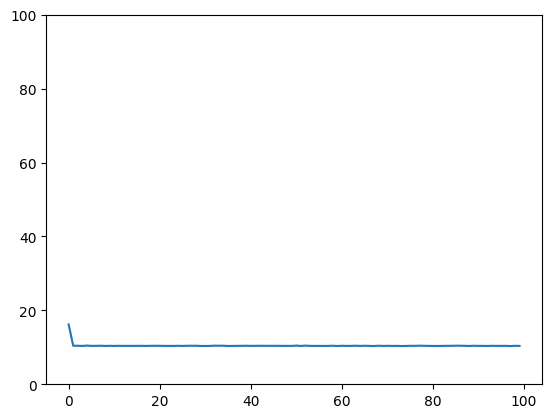

In [37]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylim(0, 100)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [42]:
model

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=2, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2, out_features=1, bias=True)
)

In [44]:
torch.save(model.state_dict(), "model_1_.pt")

In [47]:
model.load_state_dict(torch.load("model_1_.pt"))
model

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=2, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2, out_features=1, bias=True)
)

In [48]:
X_data = torch.FloatTensor(X.iloc[:1].values)
X_data

tensor([[0.4550, 0.3650, 0.0950]])

In [49]:
res = model(X_data)
res

tensor([[9.9398]], grad_fn=<AddmmBackward0>)

In [1]:

import torch
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)


df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/abalone.csv')
df.drop(columns=['Type', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'], inplace=True)

In [3]:
df.head()

,LongestShell,Diameter,Height,Rings
0,0.455,0.365,0.095,15
1,0.350,0.265,0.090,7
2,0.530,0.420,0.135,9
3,0.440,0.365,0.125,10
4,0.330,0.255,0.080,7


In [2]:
device

'cuda'

In [14]:
from torch.utils.data import Dataset
import torch

class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.FloatTensor(X.values).to(device)
    self.y = torch.FloatTensor(y.values).to(device)
    self.y = self.y.reshape(-1, 1)


  def __len__(self):
    return len(self.X)


  def __getitem__(self, index):
    return self.X[index], self.y[index]


X = df.drop("Rings", axis="columns")
y = df["Rings"]


dataset = MyDataset(X, y)

In [16]:

from torch.utils.data import DataLoader

batch_size = 256
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=True,
                        generator=torch.Generator(device=device))

In [17]:
X_batch, y_batch = next(iter(dataloader))
X_batch.shape

torch.Size([256, 3])

In [18]:
X_batch.device

device(type='cuda', index=0)

In [20]:
from torch import nn

model = nn.Sequential(
    nn.Linear(3, 7),
    nn.LeakyReLU(),
    nn.Linear(7, 6),
    nn.LeakyReLU(),
    nn.Linear(6, 5),
    nn.LeakyReLU(),
    nn.Linear(5, 4),
    nn.LeakyReLU(),
    nn.Linear(4, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 2),
    nn.LeakyReLU(),
    nn.Linear(2, 1)
)


In [21]:
from torchsummary import summary

summary(model, input_size=(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 7]              28
         LeakyReLU-2                    [-1, 7]               0
            Linear-3                    [-1, 6]              48
         LeakyReLU-4                    [-1, 6]               0
            Linear-5                    [-1, 5]              35
         LeakyReLU-6                    [-1, 5]               0
            Linear-7                    [-1, 4]              24
         LeakyReLU-8                    [-1, 4]               0
            Linear-9                    [-1, 3]              15
        LeakyReLU-10                    [-1, 3]               0
           Linear-11                    [-1, 2]               8
        LeakyReLU-12                    [-1, 2]               0
           Linear-13                    [-1, 1]               3
Total params: 161
Trainable params: 161

In [22]:
from torch.optim import SGD

loss_func = nn.MSELoss()

optimizer = SGD(model.parameters(), lr=1e-3)

In [24]:
import numpy as np

epochs = 100

losses = []

for epoch in range(epochs):
  t_losses = []
  for X_batch, y_batch in dataloader:
    y_pred = model(X_batch)
    loss = loss_func(y_pred, y_batch)

    t_losses.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  losses.append(np.mean(t_losses))


  if epoch % 1 == 0:
          print(f'loss={losses[epoch]}')


loss=10.3884438346414
loss=10.372099203221937
loss=10.34789483687457
loss=10.237684754764333
loss=10.43034205717199
loss=10.48817662631764
loss=10.463734121883617
loss=10.438405654009651
loss=10.43338015500237
loss=10.374496347763959
loss=10.422088735243854
loss=10.374096028945026
loss=10.293182849884033
loss=10.24805711297428
loss=10.45290714151719
loss=10.344860189101276
loss=10.22176310595344
loss=10.279768242555505
loss=10.440691835740033
loss=10.315107121187097
loss=10.401328086853027
loss=10.345168674693388
loss=10.256171282599954
loss=10.497803519753848
loss=10.440160134259392
loss=10.502990386065315
loss=10.421567860771628
loss=10.378373819239
loss=10.395519312690286
loss=10.335017428678626
loss=10.412631062900319
loss=10.468472144182991
loss=10.521117659176097
loss=10.431260782129625
loss=10.49815419140984
loss=10.552301743451286
loss=10.33030397751752
loss=10.304561614990234
loss=10.365720468408922
loss=10.338626524981331
loss=10.298696013057933
loss=10.375701960395364
loss=1

(0.0, 100.0)

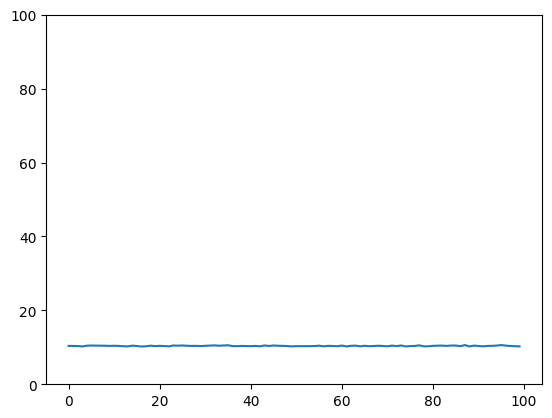

In [25]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylim(0, 100)

In [26]:
torch.save(model.state_dict(), "model_2_.pt")

In [27]:
model.load_state_dict(torch.load("model_2_.pt"))
model

Sequential(
  (0): Linear(in_features=3, out_features=7, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=7, out_features=6, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=6, out_features=5, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=5, out_features=4, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=4, out_features=3, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=3, out_features=2, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=2, out_features=1, bias=True)
)

In [32]:
X_data = torch.FloatTensor(X.iloc[:1].values)
X_data.to(device)

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

In [33]:
res = model(X_data)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)